In [1]:
# importing libraries
import xgboost as xgb
import numpy as np
import pandas as pd
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [2]:
# Reading data
train=pd.read_csv("D:/inqline/training.csv")
data=pd.read_csv("D:/inqline/hackathon_data_round2.csv")

In [3]:
# Filling null values

train.Gender[train['Gender'].isnull()]="M"
train.Donor_Blood_Pressure[train['Donor_Blood_Pressure'].isnull()]="120/80"
train.Test_3[train['Test_3'].isnull()]="P"
train.Test_3[train['Test_3']=="R"]="P"
train.Test_4[train['Test_4'].isnull()]="P"
train.shape

data.Gender[data['Gender'].isnull()]="M"
data.Donor_Blood_Pressure[data['Donor_Blood_Pressure'].isnull()]="120/80"
data.Test_3[data['Test_3'].isnull()]="P"
data.Test_3[data['Test_3']=="R"]="P"
data.Test_4[data['Test_4'].isnull()]="P"
data.shape

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\HP\Anaconda3\lib\site-pack

(225498, 20)

In [4]:
# Approach for selection of features

# sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
# sel.fit(X_train, y_train)
# sel.get_support()

col=[0,3,4,6,7,10,15,16] # selected features

In [5]:
X_train=train.iloc[:, col]
y_train=train["Y"]
X=data.iloc[:, col]

In [6]:
labelencoder = LabelEncoder()
X_train.iloc[:, 4] = labelencoder.fit_transform(X_train.iloc[:, 4])
# X.iloc[:, 4] = labelencoder.fit_transform(X.iloc[:, 4])
# X.to_csv("c.csv")

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
# Imputation, because of too large values
imp = Imputer()
imp.fit(X_train)
X_train = imp.transform(X_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
# Pipeline for Algorithm
pipeline = Pipeline([
        ("st_scaler",StandardScaler()),
#        ("scaler", MinMaxScaler()),
                             ("logistic_model",LogisticRegression())])

In [9]:
#pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)
#pipeline.score(X_test, y_test)

In [10]:
print(np.mean(cross_val_score(pipeline, X_train, y_train, cv=5)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.9826305143037309


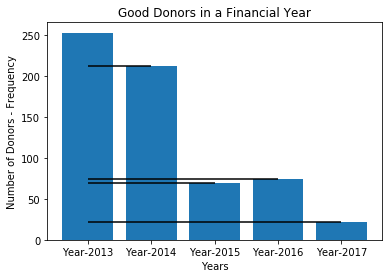

In [11]:
# Converting string to Datetime
data['Donation_Date'] = pd.to_datetime(data['Donation_Date'])

# Condition for good donor
forecast=(data.C1!="N") & (data.C2!="N") & (data.Test_3!="N") & (data.Test_4!="N")

year_2013=data.Donation_Date[(data['Donation_Date'] > "30-JUN-13") & 
                             (data['Donation_Date'] <= "30-JUN-14") & forecast]

year_2014=data.Donation_Date[(data['Donation_Date'] > "30-JUN-14") & 
                             (data['Donation_Date'] <= "30-JUN-15") & forecast]

year_2015=data.Donation_Date[(data['Donation_Date'] > "30-JUN-15") & 
                             (data['Donation_Date'] <= "30-JUN-16") & forecast]

year_2016=data.Donation_Date[(data['Donation_Date'] > "30-JUN-16") & 
                             (data['Donation_Date'] <= "30-JUN-17") & forecast]

year_2017=data.Donation_Date[(data['Donation_Date'] > "30-JUN-17") & 
                             (data['Donation_Date'] <= "30-JUN-18") & forecast]

x=["Year-2013", "Year-2014", "Year-2015", "Year-2016", "Year-2017"]
y=[year_2013.count(), year_2014.count(), year_2015.count(), year_2016.count(), year_2017.count()]

plt.bar(x,y,align='center') # A bar chart
plt.title('Good Donors in a Financial Year')
plt.xlabel('Years')
plt.ylabel('Number of Donors - Frequency')

for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()


In [12]:
data=pd.read_csv("D:/inqline/hackathon_data_round2.csv")
# Dropping null value data by Donor_Age
data = data.dropna(axis=0, subset=['Donor_Age'])
# Converting to_datetime
data['Donation_Date'] = pd.to_datetime(data['Donation_Date'])
forecast=(data.C1!="N") & (data.C2!="N") & (data.Test_3!="N") & (data.Test_4!="N")

X = (data.Donor_Age[forecast]).values

In [13]:
# Summary of ARIMA Model
model = ARIMA(data.Donor_Age[forecast], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HP\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead

                             ARIMA Model Results                              
Dep. Variable:            D.Donor_Age   No. Observations:                  469
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1875.392
Method:                       css-mle   S.D. of innovations             13.180
Date:                Sun, 21 Apr 2019   AIC                           3764.783
Time:                        11:52:16   BIC                           3793.838
Sample:                             1   HQIC                          3776.215
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.177      0.002      0.998      -0.347       0.348
ar.L1.D.Donor_Age    -0.7994      0.045    -17.608      0.000      -0.888      -0.710
ar.L2.D.Donor_Age    -0.

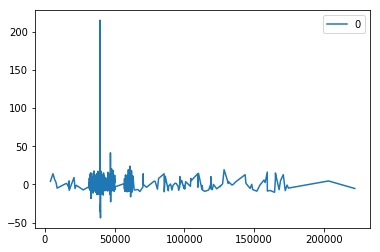

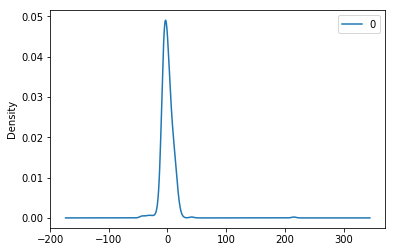

                0
count  469.000000
mean     0.033959
std     13.198426
min    -43.983988
25%     -5.821185
50%     -1.407326
75%      4.434126
max    215.172730


In [14]:
# Residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [15]:
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
print('predicted=%f, expected=%f ...' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE (Donor_Age): %.3f' % error)


predicted=30.442235, expected=25.000000 ...
Test MSE: 54.584


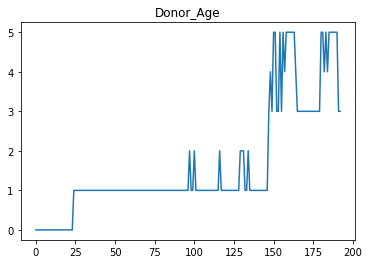

In [41]:
# Plot Forecasting by Donor_Age
plt.title("Donor_Age")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [31]:
data=pd.read_csv("D:/inqline/hackathon_data_round2.csv")
data['Donation_Date'] = pd.to_datetime(data['Donation_Date'])
forecast=(data.C1!="N") & (data.C2!="N") & (data.Test_3!="N") & (data.Test_4!="N")

In [35]:
# Dropping null value data by Donor_Age
data = data.dropna(axis=0, subset=['Branch_Code'])
labelencoder = LabelEncoder()
X = data.Branch_Code[forecast]
X = labelencoder.fit_transform(X)

In [36]:
# Summary of ARIMA Model (Branch_Code)
model2 = ARIMA(X, order=(5,1,0))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  642
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -52.788
Method:                       css-mle   S.D. of innovations              0.263
Date:                Sun, 21 Apr 2019   AIC                            119.576
Time:                        12:14:45   BIC                            150.828
Sample:                             1   HQIC                           131.705
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.007      0.677      0.499      -0.009       0.019
ar.L1.D.y     -0.3828      0.040     -9.671      0.000      -0.460      -0.305
ar.L2.D.y     -0.1180      0.045     -2.637      0.0

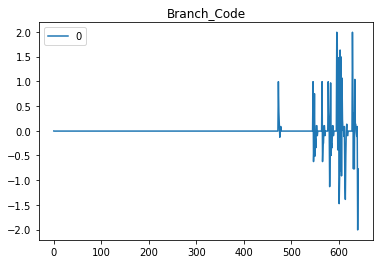

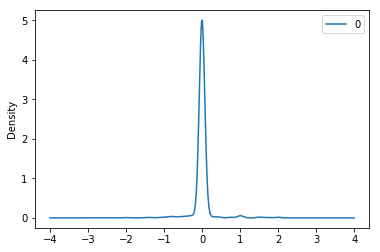

                0
count  642.000000
mean    -0.000005
std      0.262853
min     -2.007022
25%     -0.007022
50%     -0.007022
75%     -0.007022
max      1.992978


In [42]:
# Residuals (Branch_Code)
residuals = pd.DataFrame(model_fit2.resid)
residuals.plot()
plt.title("Branch_Code")
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())